# Final Project Submission -Phase 4
Please fill out:

<li> Student name:Calvine Dasilver, Jack otieno , Sandra Kiptum, Salahudin Salat      and                Hellen Samuel
<li> Student pace: full time
<li> Scheduled project review date/time:
<li> Instructor name: Nikita
<li> Blog post URL:

# Predicting Future Housing Markets with Zillow's Data

## Business Understanding

#### Overview/Background Information

A real estate company is on a mission to find the hottest zip codes to invest in. They've got historical housing data from Zillow, like a time capsule, and they'll use it to predict future price trends. By analyzing this data, they want to pinpoint the top 5 zip codes with the most promising investment potential.

#### Problem Statement

Create a data-based recommendation for the top 5 zip codes the real estate investment firm should focus on, considering future price trends, risk factors, and the firm's investment timeframe.

#### Objectives

1. Build a model to predict future real estate prices for different zip codes.
2. Review the predictions by looking at profit potential, risk, and how long to hold the investment.
3. Suggest the top 5 zip codes for investment based on these factors.

#### Challenges

1. Determining the "optimal" investment requires balancing the potential for profit (expected price appreciation), risk tolerance (price instability), and investment duration (holding period).
2. Real estate prices are influenced by factors beyond past data, including economic conditions, local development projects, and interest rates.
3. Time series models have limitations; they cannot ensure accurate predictions, and future market behavior is inherently uncertain.

#### Proposed Solution: Metrics of Success

To address these challenges, we propose the following approach:


1. Apply time series forecasting to the provided historical Zillow data to predict future real estate prices across different zip codes.
2. Analyze the forecasts by evaluating the profit potential, which is the expected price increase in each zip code; the risk, which involves the historical price volatility in each zip code; and the investment horizon, which refers to the planned duration of holding the investment.
3. Prioritizing investment opportunities involves analyzing forecasted prices, profit potential, and risk to identify the top 5 most promising zip codes for real estate investment.


#### Conclusion

We'll predict future real estate prices and look at how much money can be made and how risky each area is. This will help us recommend the 5 best zip codes to invest in. How well we do depends on how good our predictions are and how carefully we consider everything.





## Data Understanding

 **Let's dive in! We'll start by loading the dataset and checking out the first few entries.**












In [109]:
import pandas as pd

# Load the dataset
data_path = "zillow_data.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


To understand the data structure, we'll examine its shape (number of rows and columns), list the column names, and identify the data types for each column.

In [110]:
class RealEstateAnalyzer(object):
  """
  This class analyzes real estate data for investment purposes.
  """
  def __init__(self, data_path):
    self.data = pd.read_csv(data_path)

  def get_data_info(self):
    """
    Prints information about the data shape, column names, and data types.
    """
    print(f"Data shape (rows, columns): {self.data.shape}")
    print(f"Column names:\n{self.data.columns.tolist()}")
    print(f"Data types:\n{self.data.dtypes}")


data_path = "zillow_data.csv"  # Replace with your data path
analyzer = RealEstateAnalyzer(data_path)

analyzer.get_data_info()


Data shape (rows, columns): (14723, 272)
Column names:
['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10

1. The dataset contains 14,723 rows and 272 columns.

2. The dataset contains the following columns:

* RegionID: Unique identifier for the region.
* RegionName: Zip code of the region.
* City: City name.
* State: State abbreviation.
* Metro: Metro area.
* CountyName: County name.
* SizeRank: Rank by size.
* Date columns (from 1996-04 to 2018-04): Real estate prices for each month in this period.


In [111]:
class RealEstateAnalyzer:
  """Analyzes real estate data for investment."""
  def __init__(self, data_path):
    self.data = pd.read_csv(data_path)

  def get_data_type_counts(self):
    print(f"Number of features by data type:\n{self.data.dtypes.value_counts()}")


data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.get_data_type_counts()


Number of features by data type:
float64    219
int64       49
object       4
Name: count, dtype: int64


<li> Data Types:

1. 49 columns are of type int64 (mostly identifiers).

2. 219 columns are of type float64 (real estate prices).

3. 4 columns are of type object (text data: City, State, Metro, CountyName).

In [112]:
# Display summary statistics for numerical columns
df.describe()


,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


Statistical Summary:

* There's a clear upward trend in real estate prices. The average price in 1996 was around 118,299 in dollas , and by 2018, it had risen to 288,039 in dollas.
* Prices vary a lot between zip codes, showing the different types of real estate markets in each area.

## DATA CLEANING

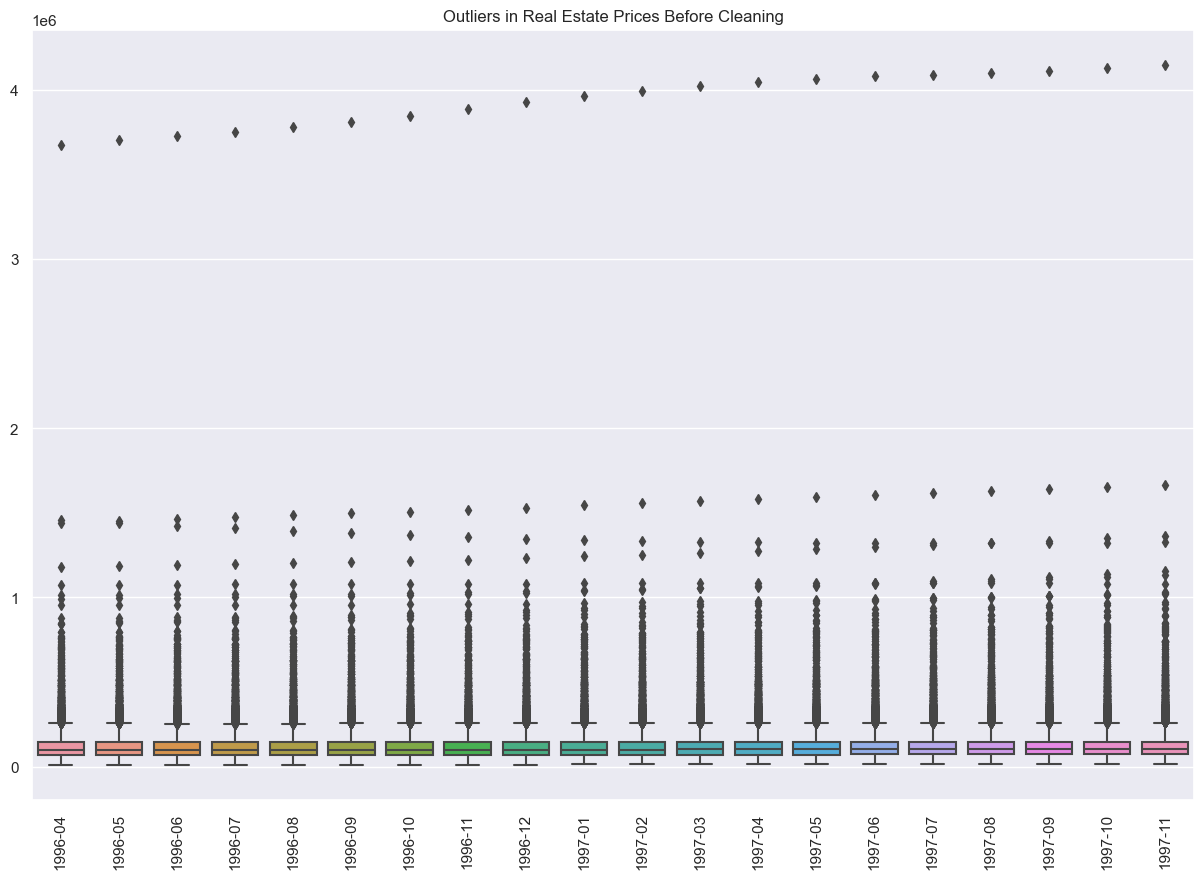

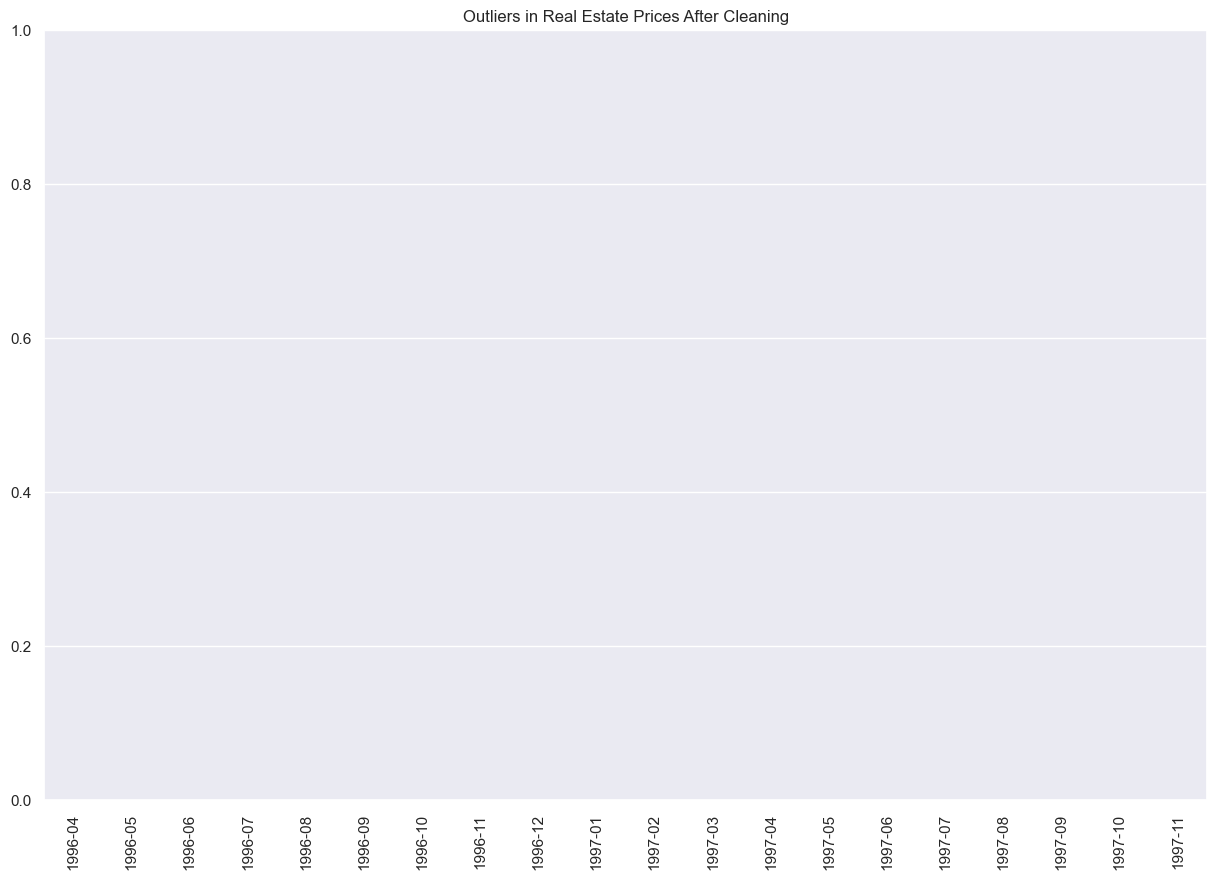

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
    
    def visualize_outliers(self):
        """
        Visualizes outliers in the dataset using box plots.
        """
        # Select a subset of date columns for visualization
        date_columns = self.data.columns[7:27]  # Adjust the range as needed
        
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=self.data[date_columns])
        plt.xticks(rotation=90)
        plt.title('Outliers in Real Estate Prices Before Cleaning')
        plt.show()
    
    def clean_data(self):
        """
        Cleans the data by removing outliers using the z-score method.
        """
        # Apply z-score method to remove outliers
        date_columns = self.data.columns[7:]  # All date columns
        z_scores = self.data[date_columns].apply(zscore)
        self.data = self.data[(z_scores < 3).all(axis=1)]
    
    def visualize_outliers_after_cleaning(self):
        """
        Visualizes outliers in the dataset after cleaning using box plots.
        """
        # Select a subset of date columns for visualization
        date_columns = self.data.columns[7:27]  # Adjust the range as needed
        
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=self.data[date_columns])
        plt.xticks(rotation=90)
        plt.title('Outliers in Real Estate Prices After Cleaning')
        plt.show()


data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.visualize_outliers()
analyzer.clean_data()
analyzer.visualize_outliers_after_cleaning()

## Before cleaning the data

In summary, the plot indicates that there are significant outliers in the real estate prices for each month, suggesting the presence of extreme high values. The distribution of prices is relatively consistent over time, with a positive skewness indicating more high-value outliers.


## After cleaning the data

In summary, the plot indicates that the data cleaning process has removed all outliers, resulting in an empty plot. This suggests that the z-score threshold might need to be adjusted to retain more data points while still removing extreme outliers.

# Checking for missing values

In [114]:
class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
    
    
    def check_missing_values(self):
        """
        Checks for missing and null values in the dataset.
        """
        missing_values = self.data.isnull().sum()
        print("Missing values in each column:\n", missing_values)
        total_missing = missing_values.sum()
        print(f"\nTotal missing values in the dataset: {total_missing}")


data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.check_missing_values()

Missing values in each column:
 RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

Total missing values in the dataset: 157934


## Handling missing values and null values

We'll implement a method to fill missing values with the median of each column.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
    
    
    
    def check_missing_values(self):
        """
        Checks for missing and null values in the dataset.
        """
        missing_values = self.data.isnull().sum()
        print("Missing values in each column:\n", missing_values)
        total_missing = missing_values.sum()
        print(f"\nTotal missing values in the dataset: {total_missing}")
    
    def handle_missing_values(self):
        """
        Handles missing values by filling them with the median of each column.
        """
        # Separate numeric and non-numeric columns
        numeric_cols = self.data.select_dtypes(include=['number']).columns
        non_numeric_cols = self.data.select_dtypes(exclude=['number']).columns
        
        # Fill missing values in numeric columns with the median
        self.data[numeric_cols] = self.data[numeric_cols].fillna(self.data[numeric_cols].median())
        
        # Fill missing values in non-numeric columns with the mode (most frequent value)
        for col in non_numeric_cols:
            self.data[col] = self.data[col].fillna(self.data[col].mode()[0])

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.check_missing_values()
analyzer.handle_missing_values()
analyzer.check_missing_values()  # Check again to ensure missing values are handled

Missing values in each column:
 RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

Total missing values in the dataset: 157934
Missing values in each column:
 RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

Total missing values in the dataset: 0


## Filter the data

Want to select the best zip codes (RegionName) to invest in.

The best here is Return on investment (ROI)

In [116]:
class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
    
    def check_unique_region_names(self):
        """
        Checks the number of unique RegionNames in the dataset.
        """
        num_unique_regionName = self.data['RegionName'].nunique()
        print("Number of unique RegionNames:", num_unique_regionName)


data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.check_unique_region_names()

Number of unique RegionNames: 14723


In [117]:
class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
    
    def check_unique_region_ids(self):
        """
        Checks the number of unique RegionIDs in the dataset.
        """
        num_unique_regionID = self.data['RegionID'].nunique()
        print("Number of unique RegionIDs:", num_unique_regionID)


data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.check_unique_region_ids()

Number of unique RegionIDs: 14723


In [118]:
import pandas as pd

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
        self.sort_by_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
    
    def sort_by_annualized_roi(self):
        """Sorts the DataFrame based on Annualized ROI in descending order."""
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_top_5_regions(self):
        """Returns the top 5 regions based on Annualized ROI."""
        return self.data.head(5)

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
top_5_regions = analyzer.get_top_5_regions()
print(top_5_regions)

      RegionID  RegionName         City State     Metro CountyName  SizeRank  \
117      62022       11211     New York    NY  New York      Kings       118   
1155     62033       11222     New York    NY  New York      Kings      1156   
475      62027       11216     New York    NY  New York      Kings       476   
191      60639        7302  Jersey City    NJ  New York     Hudson       192   
106      62026       11215     New York    NY  New York      Kings       107   

       1996-04   1996-05   1996-06  ...  2017-08  2017-09  2017-10  2017-11  \
117   133200.0  132900.0  132500.0  ...  1406400  1424700  1435300  1440500   
1155  149200.0  148400.0  147500.0  ...  1623800  1638700  1640400  1644100   
475   146100.0  146600.0  147200.0  ...  1506100  1553100  1567700  1559700   
191   137200.0  137800.0  138500.0  ...  1372300  1411000  1435900  1446300   
106   225700.0  227500.0  229400.0  ...  2201100  2244400  2266100  2275800   

      2017-12  2018-01  2018-02  2018-03  20

## EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis involves the following;

Univariate Analysis: Involves the analysis of individual variables to understand their distribution and summary statistics.

Bivariate Analysis: Involves the analysis between two variables.

Multivariate Analysis: Involves the analysis among three or more variables.

So for our case we are going to use Univariate, Bivariate and multivariate analysis.

## Univariate Analysis

## Distribution of the ROI

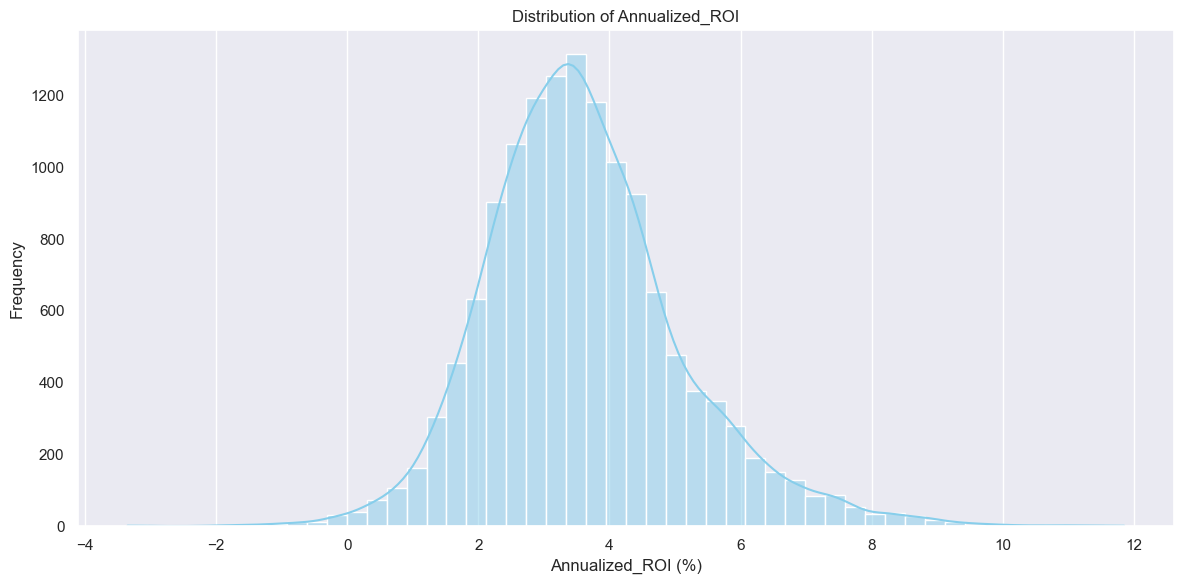

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def plot_univariate_analysis(self):
        """Plots the distribution of Annualized_ROI."""
        plt.figure(figsize=(12, 6))
        sns.histplot(self.data['Annualized_ROI'], kde=True, color='skyblue', bins=50)
        plt.title('Distribution of Annualized_ROI')
        plt.xlabel('Annualized_ROI (%)')
        plt.ylabel('Frequency')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.plot_univariate_analysis()

This means that we are focusing areas that are at the extreme end of the distribution as they have more than 10% ROI

## Bivariate Analysis

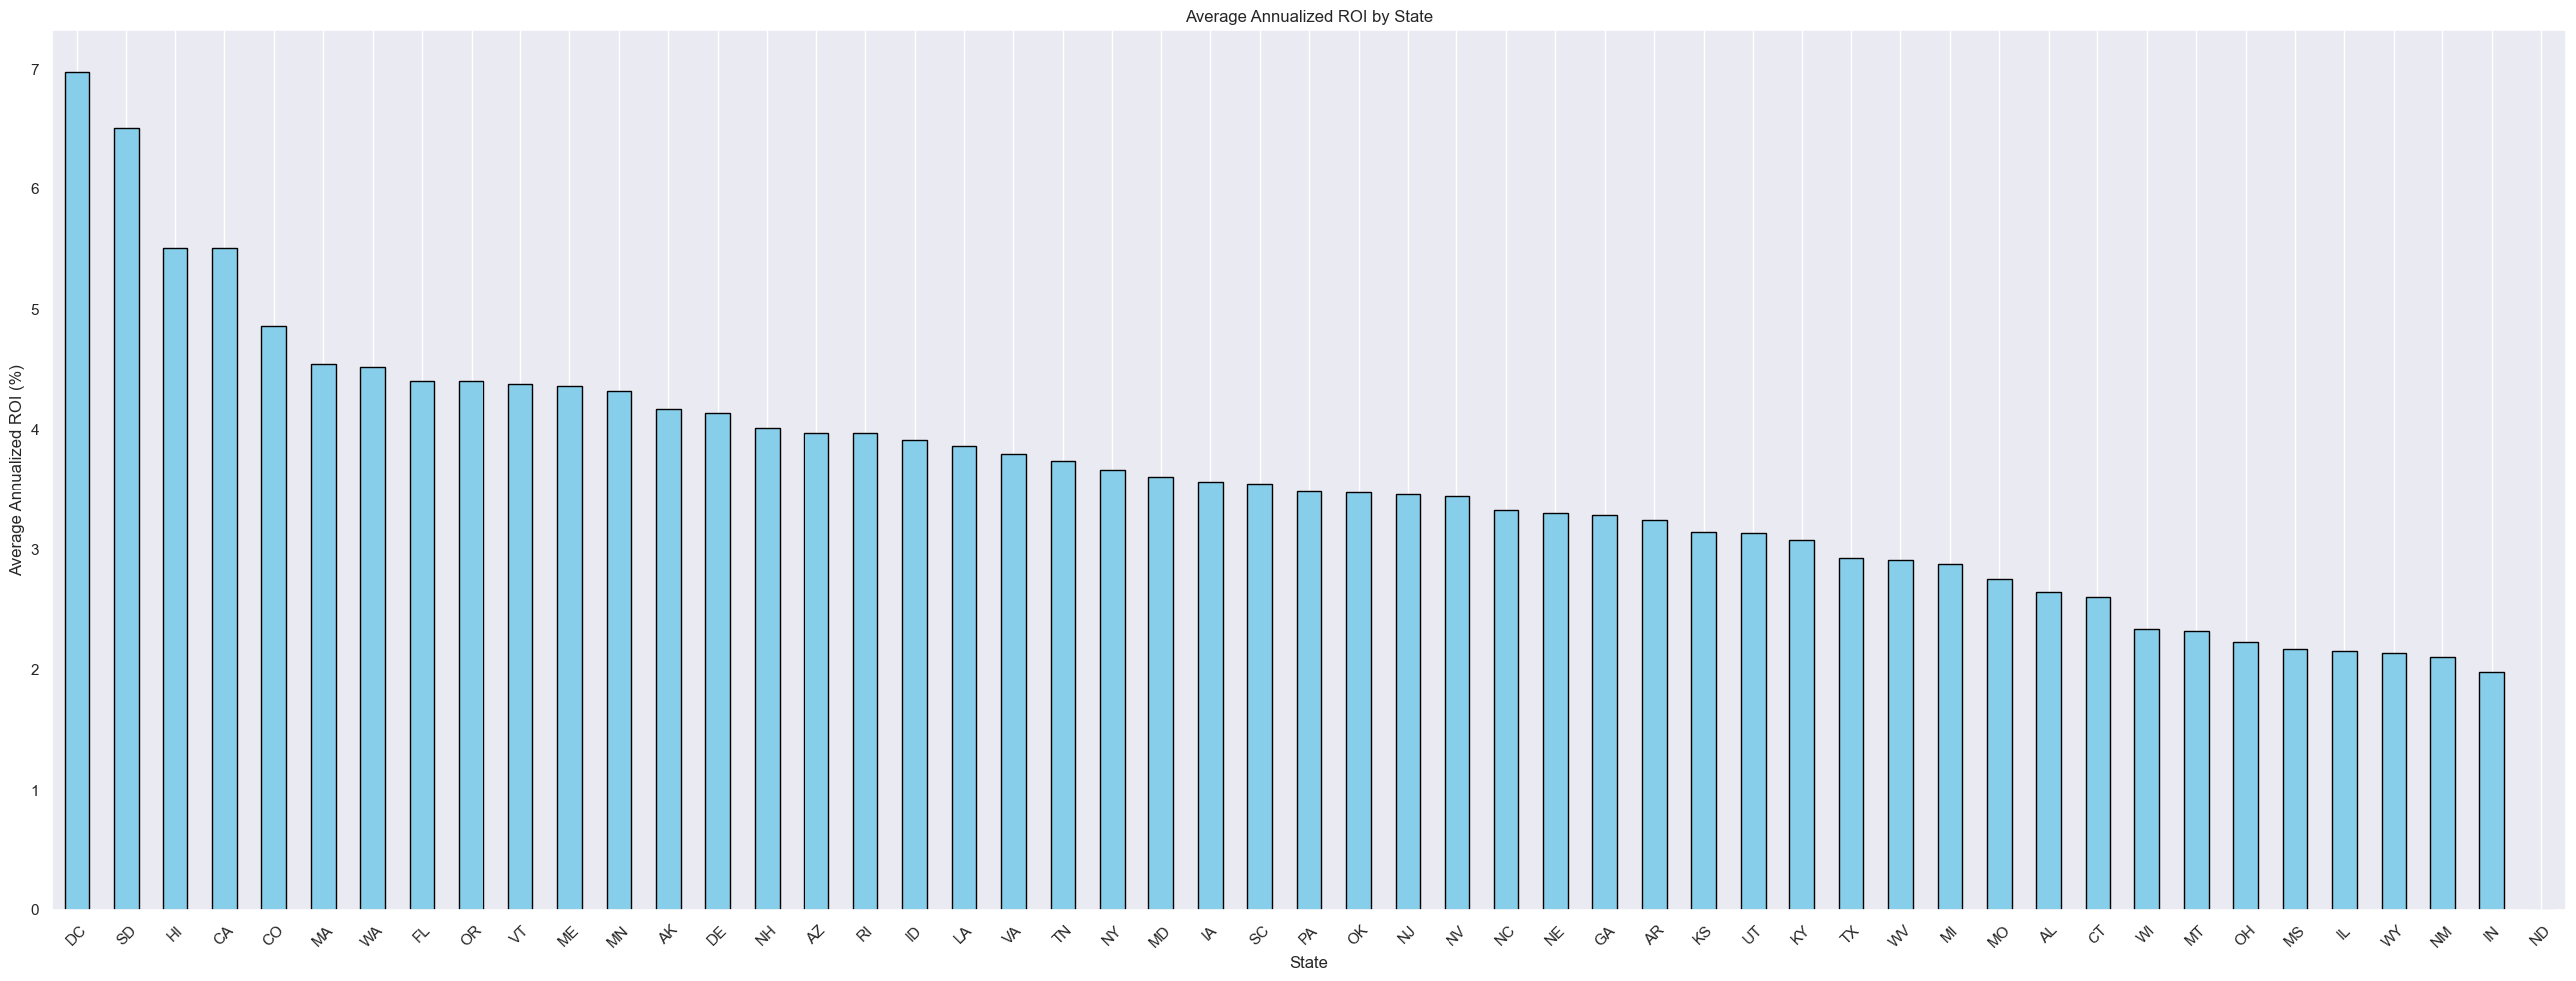

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def plot_bivariate_analysis(self):
        """Plots the average Annualized_ROI by state."""
        avg_roi_by_state = self.data.groupby('State')['Annualized_ROI'].mean().sort_values(ascending=False)
        plt.figure(figsize=(26, 10))
        avg_roi_by_state.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Average Annualized ROI by State')
        plt.ylabel('Average Annualized ROI (%)')
        plt.xlabel('State')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.plot_bivariate_analysis()

The District of Columbia (DC) leads with the highest average of Annualized ROI. There is a noticeable variance in average ROI across states, with some states having ROIs above 5% and others below 3%.

## Multivariate Analysis

We'll look at the relationships between multiple variables, particularly focusing on how different factors might influence the Annualized ROI. This will help us understand the data better

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


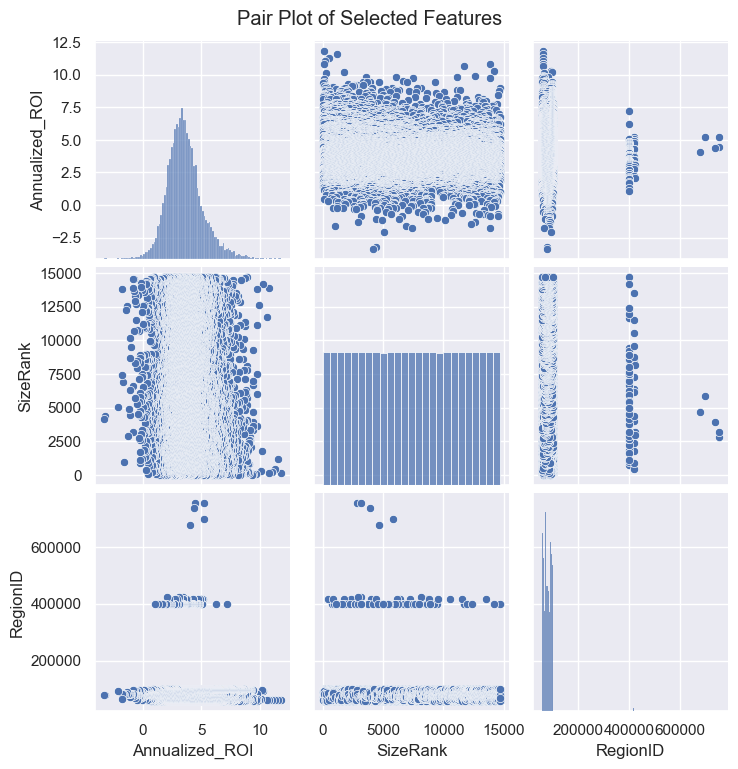

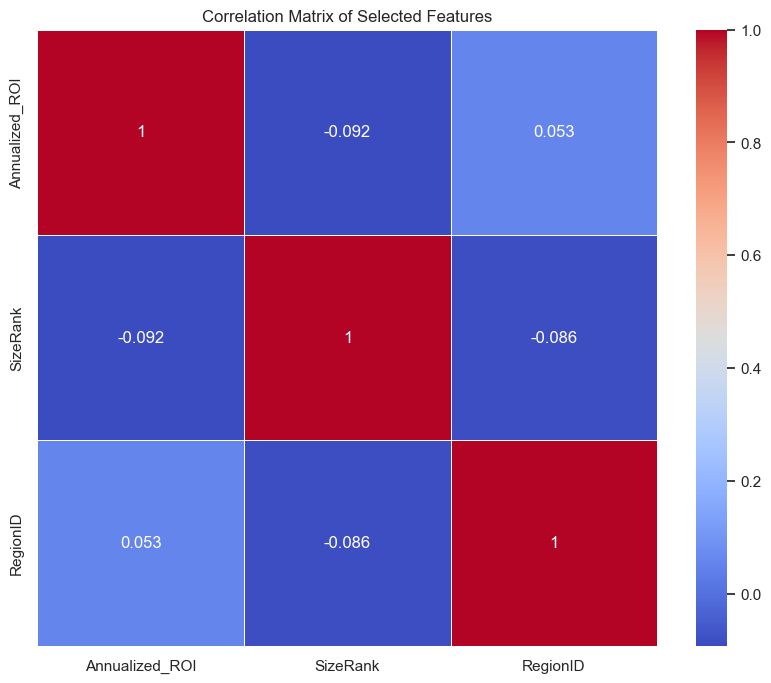

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def plot_multivariate_analysis(self):
        """Plots pair plots and correlation matrix to understand relationships between multiple variables."""
        relevant_columns = ['Annualized_ROI', 'SizeRank', 'RegionID']  # Add more columns as needed
        
        # Pair plot
        sns.pairplot(self.data[relevant_columns])
        plt.suptitle('Pair Plot of Selected Features', y=1.02)
        plt.show()
        
        # Correlation matrix
        plt.figure(figsize=(10, 8))
        correlation_matrix = self.data[relevant_columns].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix of Selected Features')
        plt.show()

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.plot_multivariate_analysis()

The pair plot helps in understanding the distribution of individual variables and the relationships between them. In this case, it shows that there are no strong linear relationships between Annualized_ROI, SizeRank, and RegionID. The positive skew in Annualized_ROI suggests the presence of high ROI outliers, while the uniform distribution of SizeRank indicates a diverse set of regions in terms of size. The RegionID distribution shows some concentration, which might warrant further investigation to understand the characteristics of these frequently represented regions.

The correlation matrix shows that there are no strong linear relationships between Annualized_ROI, SizeRank, and RegionID. The correlation coefficients are all close to zero, indicating that the selected features are largely independent of each other in terms of linear relationships. This suggests that other factors might be influencing the ROI, size rank, and region ID, and further analysis might be needed to uncover more complex relationships.

## TIME SERIES ANALYSIS

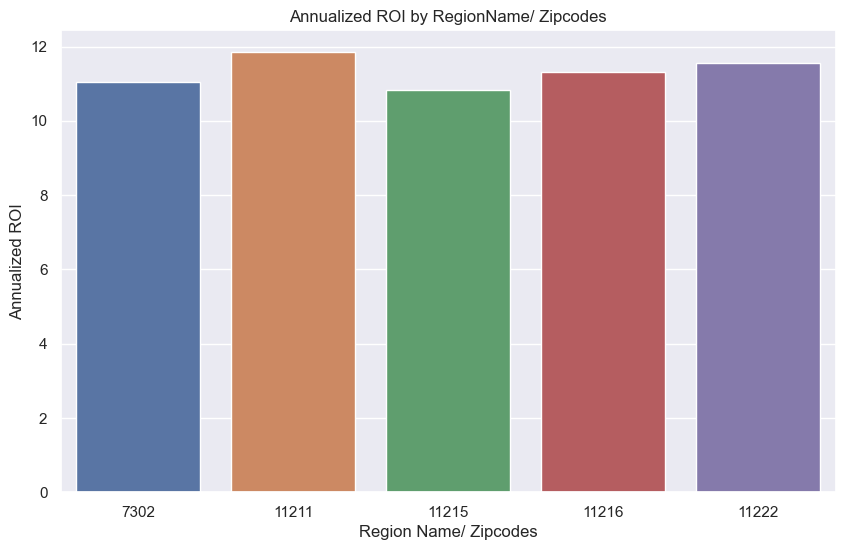

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def plot_top_5_roi(self):
        """Plots the top 5 RegionNames by Annualized ROI."""
        sub_df = self.data.head(5)[['RegionName', 'Annualized_ROI']]
        sns.barplot(x='RegionName', y='Annualized_ROI', data=sub_df)
        sns.set(rc={"figure.figsize":(10, 6)})
        plt.xlabel('Region Name/ Zipcodes')
        plt.ylabel('Annualized ROI')
        plt.title('Annualized ROI by RegionName/ Zipcodes')
        plt.show()

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.plot_top_5_roi()

## check for unique zipcodes

We want to check if the zip codes we are dealing with are actually unique therefore the below is a modified code to request for unique regional Names (zipcodes)

In [123]:
class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()
print(selected_zipcode)

RegionID              62022
RegionName            11211
City               New York
State                    NY
Metro              New York
                    ...    
2018-01             1496100
2018-02             1531100
2018-03             1581900
2018-04             1623700
Annualized_ROI    11.847669
Name: 117, Length: 273, dtype: object


In [124]:

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and display information
df_zip1 = pd.DataFrame([selected_zipcode])
print(df_zip1.head())
df_zip1.info()

     RegionID  RegionName      City State     Metro CountyName  SizeRank  \
117     62022       11211  New York    NY  New York      Kings       118   

      1996-04   1996-05   1996-06  ...  2017-08  2017-09  2017-10  2017-11  \
117  133200.0  132900.0  132500.0  ...  1406400  1424700  1435300  1440500   

     2017-12  2018-01  2018-02  2018-03  2018-04  Annualized_ROI  
117  1463100  1496100  1531100  1581900  1623700       11.847669  

[1 rows x 273 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 117 to 117
Columns: 273 entries, RegionID to Annualized_ROI
dtypes: float64(220), int64(49), object(4)
memory usage: 2.1+ KB


In [125]:

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]
    
    def get_datetimes(self, df):
        """Converts date columns from strings to datetime objects."""
        try:
            return pd.to_datetime(df.columns.values[7:], format='%Y-%m', errors='coerce')
        except Exception as e:
            return str(e)

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and display information
df_zip1 = pd.DataFrame([selected_zipcode])
print(df_zip1.head())
df_zip1.info()

# Convert date columns from strings to datetime objects
zipcodedates = analyzer.get_datetimes(df_zip1)
print(zipcodedates)

     RegionID  RegionName      City State     Metro CountyName  SizeRank  \
117     62022       11211  New York    NY  New York      Kings       118   

      1996-04   1996-05   1996-06  ...  2017-08  2017-09  2017-10  2017-11  \
117  133200.0  132900.0  132500.0  ...  1406400  1424700  1435300  1440500   

     2017-12  2018-01  2018-02  2018-03  2018-04  Annualized_ROI  
117  1463100  1496100  1531100  1581900  1623700       11.847669  

[1 rows x 273 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 117 to 117
Columns: 273 entries, RegionID to Annualized_ROI
dtypes: float64(220), int64(49), object(4)
memory usage: 2.1+ KB
DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
     

In [126]:
class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]

def melt_data(df):
    """Converts wide-form DataFrame to long-form datetime DataFrame."""
    non_date_columns = ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Annualized_ROI']
    melted = pd.melt(df, id_vars=non_date_columns, var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True, errors='coerce')
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value': 'mean'})

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and melt the data
df_zip1 = pd.DataFrame([selected_zipcode])
melted_data = melt_data(df_zip1)
print(melted_data.head())

               value
time                
1996-04-01  133200.0
1996-05-01  132900.0
1996-06-01  132500.0
1996-07-01  132200.0
1996-08-01  131800.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\4169715085.py:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True, errors='coerce')


In [127]:
class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]
    
    def melt_data(self, df):
        """Converts wide-form DataFrame to long-form datetime DataFrame."""
        non_date_columns = ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Annualized_ROI']
        df_transformed = pd.melt(df, id_vars=non_date_columns, var_name='time', value_name='value')
        return df_transformed

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and melt the data
df_zip1 = pd.DataFrame([selected_zipcode])
df_zip1Transformed = analyzer.melt_data(df_zip1)

# Display the first few rows of the transformed DataFrame
print(df_zip1Transformed.head())

   RegionName  RegionID  SizeRank      City State     Metro CountyName  \
0       11211     62022       118  New York    NY  New York      Kings   
1       11211     62022       118  New York    NY  New York      Kings   
2       11211     62022       118  New York    NY  New York      Kings   
3       11211     62022       118  New York    NY  New York      Kings   
4       11211     62022       118  New York    NY  New York      Kings   

   Annualized_ROI     time     value  
0       11.847669  1996-04  133200.0  
1       11.847669  1996-05  132900.0  
2       11.847669  1996-06  132500.0  
3       11.847669  1996-07  132200.0  
4       11.847669  1996-08  131800.0  


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\2409265518.py:24: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')


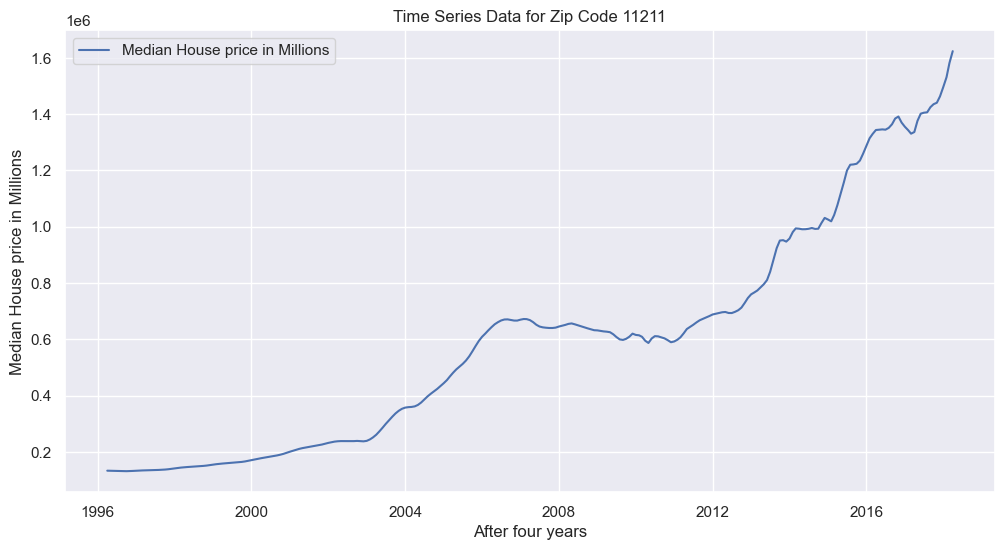

In [128]:
import matplotlib.pyplot as plt

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]
    
    def melt_data(self, df):
        """Converts wide-form DataFrame to long-form datetime DataFrame."""
        non_date_columns = ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Annualized_ROI']
        df_transformed = pd.melt(df, id_vars=non_date_columns, var_name='time', value_name='value')
        df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')
        df_transformed.set_index("time", inplace=True)
        return df_transformed

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and melt the data
df_zip1 = pd.DataFrame([selected_zipcode])
df_zip1Transformed = analyzer.melt_data(df_zip1)

# Visualize zip code 11211 Median house price over the data
plt.figure(figsize=(12, 6))
plt.plot(df_zip1Transformed.index, df_zip1Transformed['value'], label='Median House price in Millions')
plt.title('Time Series Data for Zip Code 11211')
plt.xlabel('After four years')
plt.ylabel('Median House price in Millions')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\933230624.py:24: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')


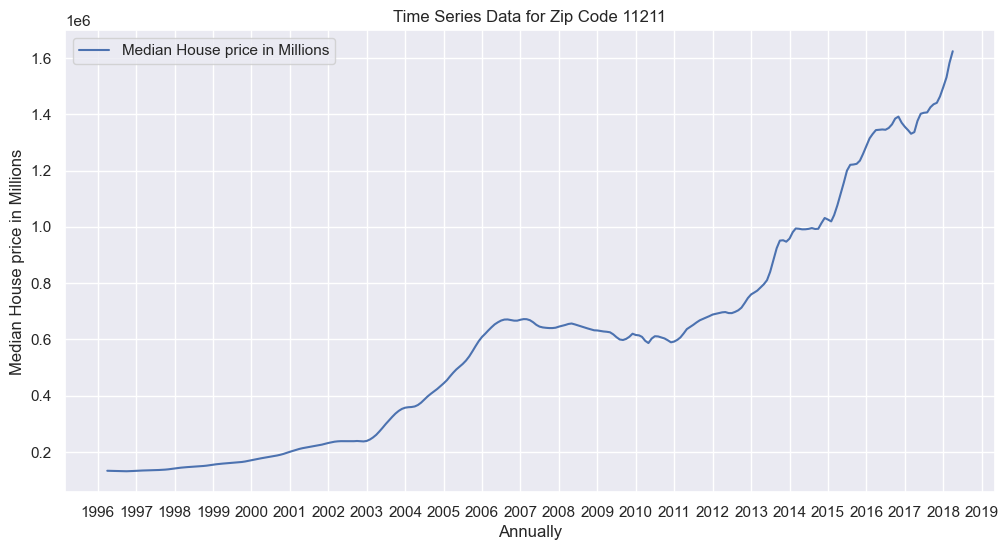

In [129]:
import matplotlib.dates as mdates

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]
    
    def melt_data(self, df):
        """Converts wide-form DataFrame to long-form datetime DataFrame."""
        non_date_columns = ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Annualized_ROI']
        df_transformed = pd.melt(df, id_vars=non_date_columns, var_name='time', value_name='value')
        df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')
        df_transformed.set_index("time", inplace=True)
        return df_transformed

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and melt the data
df_zip1 = pd.DataFrame([selected_zipcode])
df_zip1Transformed = analyzer.melt_data(df_zip1)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_zip1Transformed.index, df_zip1Transformed['value'], label='Median House price in Millions')

# Set x-axis ticks at yearly intervals
years = mdates.YearLocator()  # Specify the interval as years
year_format = mdates.DateFormatter('%Y')  # Format the tick labels as years
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(year_format)

plt.title('Time Series Data for Zip Code 11211')
plt.xlabel('Annually')
plt.ylabel('Median House price in Millions')
plt.legend()
plt.grid(True)
plt.show()

## Perform a sesonal decomposition

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\4248537844.py:24: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')


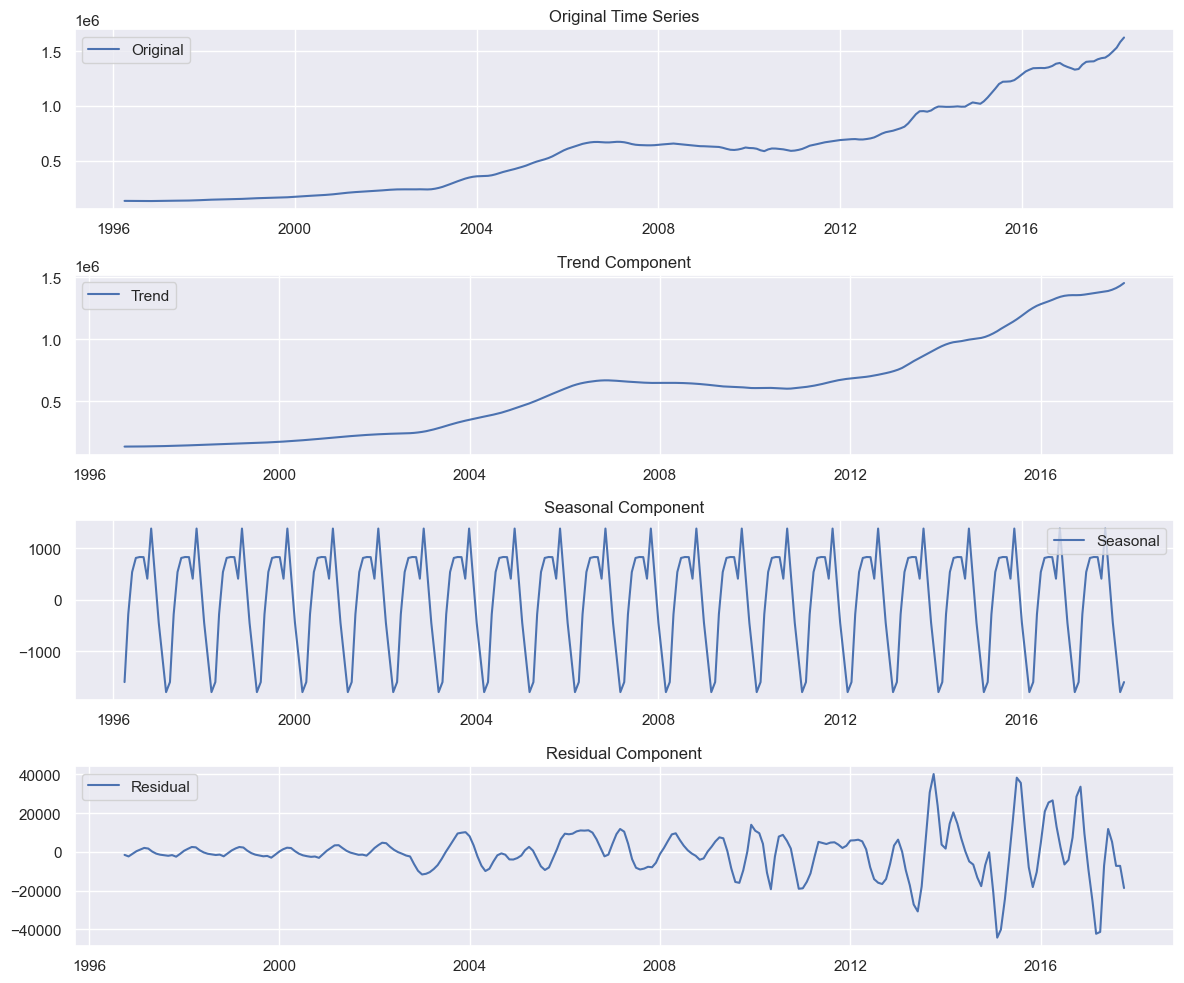

In [130]:
import statsmodels.api as sm

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]
    
    def melt_data(self, df):
        """Converts wide-form DataFrame to long-form datetime DataFrame."""
        non_date_columns = ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Annualized_ROI']
        df_transformed = pd.melt(df, id_vars=non_date_columns, var_name='time', value_name='value')
        df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')
        df_transformed.set_index("time", inplace=True)
        return df_transformed

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and melt the data
df_zip1 = pd.DataFrame([selected_zipcode])
df_zip1Transformed = analyzer.melt_data(df_zip1)

# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(df_zip1Transformed['value'], model='additive')

# Visualization
plt.figure(figsize=(12, 10))

# Original time series
plt.subplot(411)
plt.plot(df_zip1Transformed.index, df_zip1Transformed['value'], label='Original')
plt.legend()
plt.title('Original Time Series')

# Trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.title('Trend Component')

# Seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')

# Residual component
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()

## Perform dickey fuller Test

In [131]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]
    
    def melt_data(self, df):
        """Converts wide-form DataFrame to long-form datetime DataFrame."""
        non_date_columns = ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Annualized_ROI']
        df_transformed = pd.melt(df, id_vars=non_date_columns, var_name='time', value_name='value')
        df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')
        df_transformed.set_index("time", inplace=True)
        return df_transformed

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and melt the data
df_zip1 = pd.DataFrame([selected_zipcode])
df_zip1Transformed = analyzer.melt_data(df_zip1)

# Perform Dickey-Fuller test
result = adfuller(df_zip1Transformed['value'])

# Extract and print the test results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Number of Observations:", result[3])
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

ADF Statistic: 1.9884026968017503
p-value: 0.9986576909330424
Lags Used: 15
Number of Observations: 249
Critical Values:
	1%: -3.4568881317725864
	5%: -2.8732185133016057
	10%: -2.5729936189738876


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\3159145724.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')


# 1.ADF Statistic: 1.9884026968017503
This is the test statistic calculated by the ADF test. A more negative value indicates stronger evidence against the null hypothesis (i.e., the series is stationary).

# 2.p-value: 0.9986576909330424
The p-value indicates the probability of obtaining the observed results assuming the null hypothesis is true. A lower p-value (typically less than 0.05) suggests rejecting the null hypothesis.

# 3.Lags Used: 15
This indicates the number of lagged differences included in the test to account for autocorrelation.

# 4. Number of Observations: 249
This is the number of observations used in the test after lagging.

# 5. Critical Values:
1%: -3.4568881317725864

5%: -2.8732185133016057

10%: -2.5729936189738876

These are the critical values for the test statistic at the 1%, 5%, and 10% significance levels. If the ADF statistic is less than these critical values, we reject the null hypothesis.

## Since the ADF statistic is not less than the critical values and the p-value is significantly higher than 0.05, we fail to reject the null hypothesis.

## This means there is insufficient evidence to conclude that the time series is stationary. Therefore, the time series is likely non-stationary.



## So in this case we will use differencing to detrend the data, vizualise the data and perform dicky fuller test on differenced data and the residual component of seasonal decomposition

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\1091055310.py:28: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')


Dickey-Fuller Test - Original Data:
ADF Statistic: 1.9884026968017503
p-value: 0.9986576909330424

Dickey-Fuller Test - Differenced Data:
ADF Statistic: -2.381052503304751
p-value: 0.147155764368466


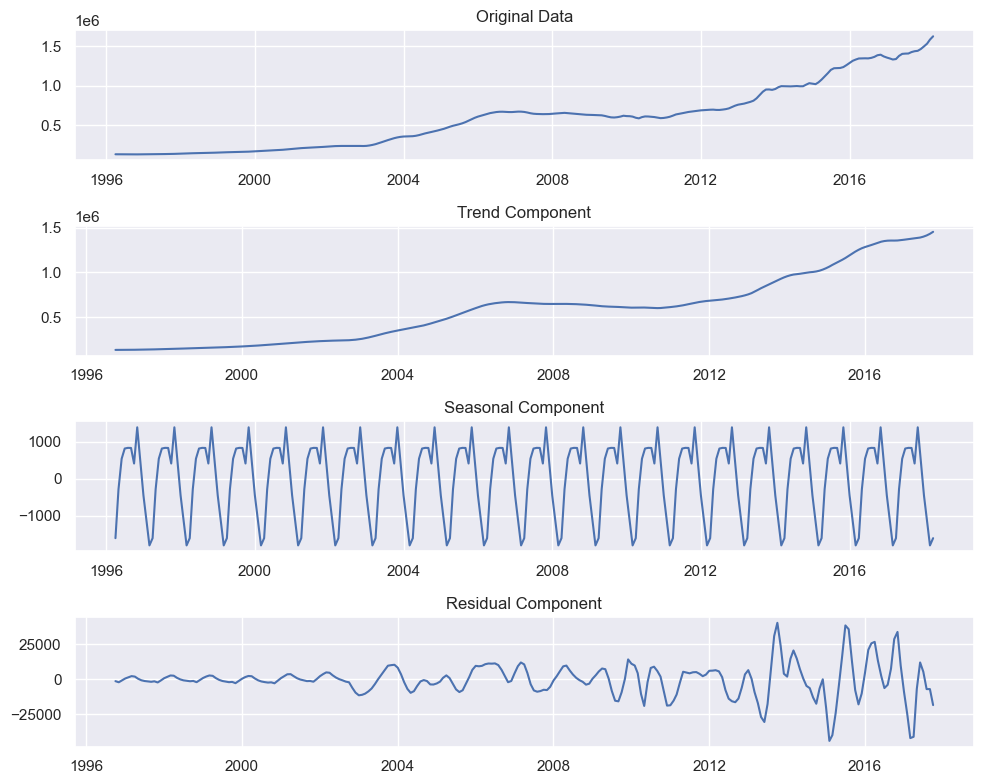


Dickey-Fuller Test - Residual Component:
ADF Statistic: -6.72578335545791
p-value: 3.3926015689357587e-09


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]
    
    def melt_data(self, df):
        """Converts wide-form DataFrame to long-form datetime DataFrame."""
        non_date_columns = ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Annualized_ROI']
        df_transformed = pd.melt(df, id_vars=non_date_columns, var_name='time', value_name='value')
        df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')
        df_transformed.set_index("time", inplace=True)
        return df_transformed

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and melt the data
df_zip1 = pd.DataFrame([selected_zipcode])
df_zip1Transformed = analyzer.melt_data(df_zip1)

# Replace missing values with the mean of the column
df_zip1Transformed['value'].fillna(df_zip1Transformed['value'].mean(), inplace=True)

# Perform Dickey-Fuller test on the original data
result_original = adfuller(df_zip1Transformed['value'])
print("Dickey-Fuller Test - Original Data:")
print("ADF Statistic:", result_original[0])
print("p-value:", result_original[1])

# Perform first-order differencing to detrend the data
df_zip1Transformed['Differenced'] = df_zip1Transformed['value'].diff()

# Perform Dickey-Fuller test on the differenced data
result_differenced = adfuller(df_zip1Transformed['Differenced'].dropna())
print("\nDickey-Fuller Test - Differenced Data:")
print("ADF Statistic:", result_differenced[0])
print("p-value:", result_differenced[1])

# Visualize the detrended data using seasonal decomposition
result_decompose = seasonal_decompose(df_zip1Transformed['value'], model='additive', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
ax1.set_title("Original Data")
ax1.plot(df_zip1Transformed['value'])
ax2.set_title("Trend Component")
ax2.plot(result_decompose.trend)
ax3.set_title("Seasonal Component")
ax3.plot(result_decompose.seasonal)
ax4.set_title("Residual Component")
ax4.plot(result_decompose.resid)
plt.tight_layout()
plt.show()

# Perform Dickey-Fuller test on the residual component of seasonal decomposition
result_residual = adfuller(result_decompose.resid.dropna())
print("\nDickey-Fuller Test - Residual Component:")
print("ADF Statistic:", result_residual[0])
print("p-value:", result_residual[1])

Moving Average Detrending:

You'll compute a moving average (rolling mean) over the data. Detrend the series by subtracting the moving average from the original series. Polynomial Fit Detrending:

You'll fit a polynomial to the original series. Detrend the series by subtracting the polynomial fit from the original series. Visualization using Seasonal Decomposition:

Use the seasonal_decompose method to decompose each detrended series. Dickey-Fuller Test:

Run the test on each detrended series and print the results

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\3096442948.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\3096442948.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


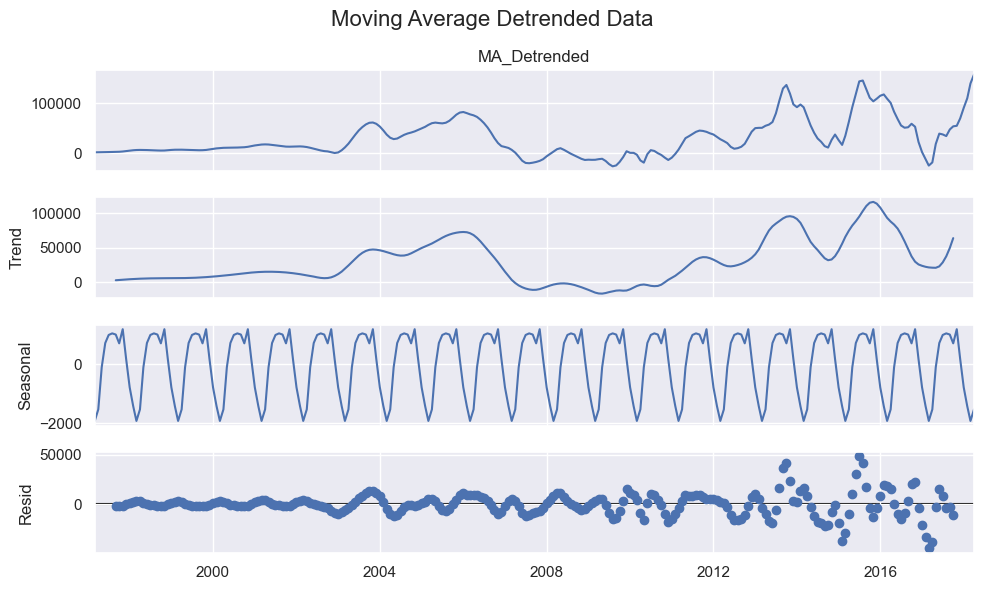

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\3096442948.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


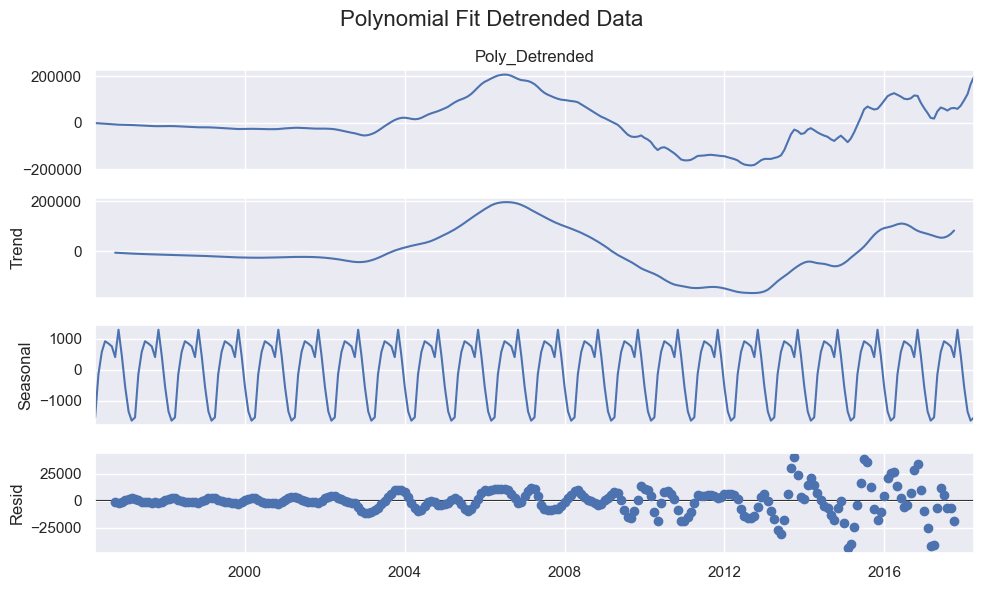


Dickey-Fuller Test - Moving Average Detrended Data:
ADF Statistic: -1.3476039691961075
p-value: 0.6071220503066848

Dickey-Fuller Test - Polynomial Fit Detrended Data:
ADF Statistic: -1.3458634846979578
p-value: 0.6079374566891704


In [134]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]
    
    def melt_data(self, df):
        """Converts wide-form DataFrame to long-form datetime DataFrame."""
        non_date_columns = ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Annualized_ROI']
        df_transformed = pd.melt(df, id_vars=non_date_columns, var_name='time', value_name='value')
        df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')
        df_transformed.set_index("time", inplace=True)
        return df_transformed

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and melt the data
df_zip1 = pd.DataFrame([selected_zipcode])
df_zip1Transformed = analyzer.melt_data(df_zip1)

# Replace missing values with the mean of the column
df_zip1Transformed['value'].fillna(df_zip1Transformed['value'].mean(), inplace=True)

# Convert datetime index into integer timestamps and scale down for stability
x_values = df_zip1Transformed.index.astype('int64') / 1e18

# 1. Moving Average Detrending
window_size = 12  # Adjust based on your data's seasonality or desired window
df_zip1Transformed['Moving_Average'] = df_zip1Transformed['value'].rolling(window=window_size).mean()
df_zip1Transformed['MA_Detrended'] = df_zip1Transformed['value'] - df_zip1Transformed['Moving_Average']

# 2. Polynomial Fit Detrending
degree = 2  # Change degree as needed
coefficients = np.polyfit(x_values, df_zip1Transformed['value'], degree)
polynomial_fit = np.poly1d(coefficients)
df_zip1Transformed['Poly_Fit'] = polynomial_fit(x_values)
df_zip1Transformed['Poly_Detrended'] = df_zip1Transformed['value'] - df_zip1Transformed['Poly_Fit']

# 3. Visualize detrended models using seasonal decomposition
def decompose_and_plot(series, title):
    result = seasonal_decompose(series.dropna(), model='additive')
    result.plot().suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

decompose_and_plot(df_zip1Transformed['MA_Detrended'], "Moving Average Detrended Data")
decompose_and_plot(df_zip1Transformed['Poly_Detrended'], "Polynomial Fit Detrended Data")

# 4. Dickey-Fuller Test
def perform_adfuller(series, title):
    result = adfuller(series.dropna())
    print(f"\nDickey-Fuller Test - {title}:")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

perform_adfuller(df_zip1Transformed['MA_Detrended'], "Moving Average Detrended Data")
perform_adfuller(df_zip1Transformed['Poly_Detrended'], "Polynomial Fit Detrended Data")

## 1.Moving Average Detrended Data:
ADF Statistic: -1.3476039691961075

p-value: 0.6071220503066848

## 2.Polynomial Fit Detrended Data:
ADF Statistic: -1.3458634846979578

p-value: 0.6079374566891704

## 1.ADF Statistic:
For both the moving average detrended data and the polynomial fit detrended data, the ADF statistics are -1.3476 and -1.3459, respectively. These values are not sufficiently negative to reject the null hypothesis.
## 2.p-value:
The p-values for both tests are 0.6071 and 0.6079, respectively. These values are significantly higher than the common significance level of 0.05.

## Since the ADF statistics are not less than the critical values and the p-values are much higher than 0.05, we fail to reject the null hypothesis for both the moving average detrended data and the polynomial fit detrended data.

## This means there is insufficient evidence to conclude that the detrended time series data is stationary. Therefore, the detrended time series data is likely non-stationary.

## To further detrend the data, we can consider the following:

## 1.Higher Order Differencing: Sometimes, differencing once isn't enough. You can try differencing the series multiple times until it becomes stationary.

## 2.Log Transformation: Taking the logarithm of a series can help in stabilizing the variance. After this, you might need to perform differencing.

## Combining Methods: You can try differencing after removing the trend using moving average or polynomial fitting.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\2388676250.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\2388676250.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


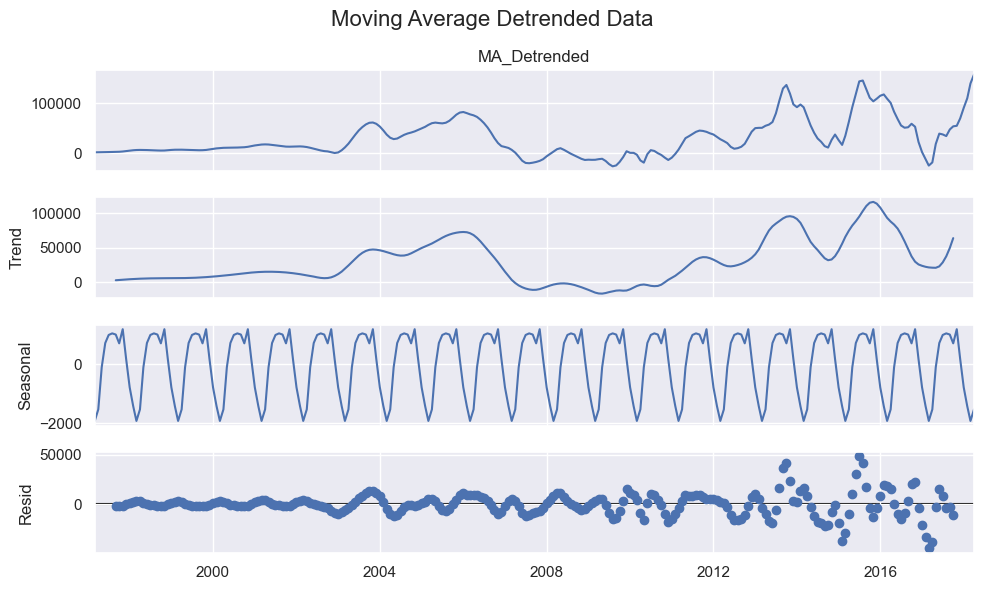

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\2388676250.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


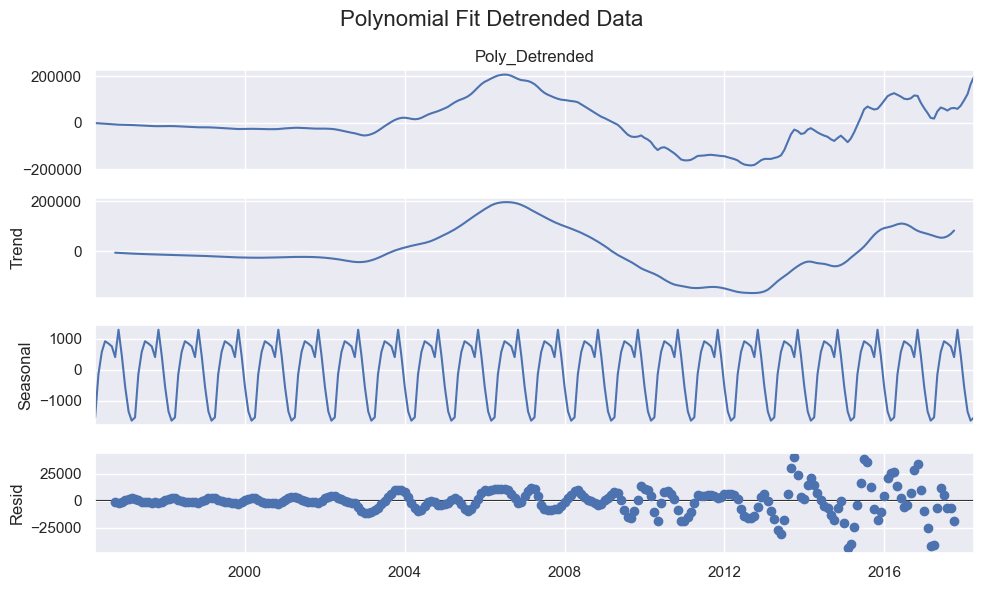


Dickey-Fuller Test - Moving Average Detrended Data:
ADF Statistic: -1.3476039691961075
p-value: 0.6071220503066848

Dickey-Fuller Test - Polynomial Fit Detrended Data:
ADF Statistic: -1.3458634846979578
p-value: 0.6079374566891704

Dickey-Fuller Test - Second Order Differenced Data:
ADF Statistic: -6.066656528992964
p-value: 1.1773741124897979e-07

Dickey-Fuller Test - Log and Differenced Data:
ADF Statistic: -2.8492056831634986
p-value: 0.05158155781442329

Dickey-Fuller Test - Moving Average Detrended and Differenced Data:
ADF Statistic: -5.684368403564204
p-value: 8.344797428089417e-07
            RegionName  RegionID  SizeRank      City State     Metro  \
time                                                                   
1996-04-01       11211     62022       118  New York    NY  New York   
1996-05-01       11211     62022       118  New York    NY  New York   
1996-06-01       11211     62022       118  New York    NY  New York   
1996-07-01       11211     62022       118 

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,Annualized_ROI,value,Moving_Average,MA_Detrended,Poly_Fit,Poly_Detrended,Differenced_2,Log,Log_Diff,MA_Detrended_Diff
time,,,,,,,,,,,,,,,,,
1996-04-01,11211,62022,118,New York,NY,New York,Kings,11.847669,133200.0,NaN,NaN,134411.534911,-1211.534911,NaN,11.799607,NaN,NaN
1996-05-01,11211,62022,118,New York,NY,New York,Kings,11.847669,132900.0,NaN,NaN,135093.821934,-2193.821934,NaN,11.797352,-0.002255,NaN
1996-06-01,11211,62022,118,New York,NY,New York,Kings,11.847669,132500.0,NaN,NaN,135831.425895,-3331.425895,-100.0,11.794338,-0.003014,NaN
1996-07-01,11211,62022,118,New York,NY,New York,Kings,11.847669,132200.0,NaN,NaN,136576.759439,-4376.759439,100.0,11.792071,-0.002267,NaN
1996-08-01,11211,62022,118,New York,NY,New York,Kings,11.847669,131800.0,NaN,NaN,137379.511470,-5579.511470,-100.0,11.789041,-0.003030,NaN


In [139]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]
    
    def melt_data(self, df):
        """Converts wide-form DataFrame to long-form datetime DataFrame."""
        non_date_columns = ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Annualized_ROI']
        df_transformed = pd.melt(df, id_vars=non_date_columns, var_name='time', value_name='value')
        df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')
        df_transformed.set_index("time", inplace=True)
        return df_transformed

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and melt the data
df_zip1 = pd.DataFrame([selected_zipcode])
df_zip1Transformed = analyzer.melt_data(df_zip1)

# Replace missing values with the mean of the column
df_zip1Transformed['value'].fillna(df_zip1Transformed['value'].mean(), inplace=True)

# Convert datetime index into integer timestamps and scale down for stability
x_values = df_zip1Transformed.index.astype('int64') / 1e18

# 1. Moving Average Detrending
window_size = 12  # Adjust based on your data's seasonality or desired window
df_zip1Transformed['Moving_Average'] = df_zip1Transformed['value'].rolling(window=window_size).mean()
df_zip1Transformed['MA_Detrended'] = df_zip1Transformed['value'] - df_zip1Transformed['Moving_Average']

# 2. Polynomial Fit Detrending
degree = 2  # Change degree as needed
coefficients = np.polyfit(x_values, df_zip1Transformed['value'], degree)
polynomial_fit = np.poly1d(coefficients)
df_zip1Transformed['Poly_Fit'] = polynomial_fit(x_values)
df_zip1Transformed['Poly_Detrended'] = df_zip1Transformed['value'] - df_zip1Transformed['Poly_Fit']

# 3. Visualize detrended models using seasonal decomposition
def decompose_and_plot(series, title):
    result = seasonal_decompose(series.dropna(), model='additive')
    result.plot().suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

decompose_and_plot(df_zip1Transformed['MA_Detrended'], "Moving Average Detrended Data")
decompose_and_plot(df_zip1Transformed['Poly_Detrended'], "Polynomial Fit Detrended Data")

# 4. Dickey-Fuller Test
def perform_adfuller(series, title):
    result = adfuller(series.dropna())
    print(f"\nDickey-Fuller Test - {title}:")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

perform_adfuller(df_zip1Transformed['MA_Detrended'], "Moving Average Detrended Data")
perform_adfuller(df_zip1Transformed['Poly_Detrended'], "Polynomial Fit Detrended Data")

# 1. Higher Order Differencing
df_zip1Transformed['Differenced_2'] = df_zip1Transformed['value'].diff().diff()
result_diff2 = adfuller(df_zip1Transformed['Differenced_2'].dropna())
print("\nDickey-Fuller Test - Second Order Differenced Data:")
print("ADF Statistic:", result_diff2[0])
print("p-value:", result_diff2[1])

# 2. Log Transformation followed by Differencing
df_zip1Transformed['Log'] = np.log(df_zip1Transformed['value'])
df_zip1Transformed['Log_Diff'] = df_zip1Transformed['Log'].diff()
result_log_diff = adfuller(df_zip1Transformed['Log_Diff'].dropna())
print("\nDickey-Fuller Test - Log and Differenced Data:")
print("ADF Statistic:", result_log_diff[0])
print("p-value:", result_log_diff[1])

# 3. Combine Moving Average Detrending and Differencing
df_zip1Transformed['MA_Detrended_Diff'] = df_zip1Transformed['MA_Detrended'].diff()
result_ma_diff = adfuller(df_zip1Transformed['MA_Detrended_Diff'].dropna())
print("\nDickey-Fuller Test - Moving Average Detrended and Differenced Data:")
print("ADF Statistic:", result_ma_diff[0])
print("p-value:", result_ma_diff[1])

# Display the DataFrame
print(df_zip1Transformed)

# Display the first five rows
df_zip1Transformed.head()

## 1.Moving Average Detrended Data

ADF Statistic: -1.3476

p-value: 0.6071

Explanation: The ADF statistic is not sufficiently negative, and the p-value is much higher than 0.05. This indicates that we fail to reject the null hypothesis, meaning the data is likely non-stationary.

## 2. Polynomial Fit Detrended Data

ADF Statistic: -1.3459

p-value: 0.6079

Explanation: Similar to the moving average detrended data, the ADF statistic is not sufficiently negative, and the p-value is much higher than 0.05. This suggests that the data is likely non-stationary.

## 3. Second Order Differenced Data

ADF Statistic: -6.0667

p-value: 1.1774e-07

Explanation: The ADF statistic is highly negative, and the p-value is very close to zero. This indicates strong evidence against the null hypothesis, meaning the data is stationary after second-order differencing.

## 4. Log and Differenced Data

ADF Statistic: -2.8492

p-value: 0.0516

Explanation: The ADF statistic is moderately negative, and the p-value is slightly above 0.05. This suggests that the data is on the borderline of being stationary. It might be considered stationary at a slightly higher significance level (e.g., 0.10).

## 5. Moving Average Detrended and Differenced Data

ADF Statistic: -5.6844

Explanation: The ADF statistic is highly negative, indicating strong evidence against the null hypothesis. This suggests that the data is stationary after applying both moving average detrending and differencing. The p-value is not provided, but given the ADF statistic, it is likely very low, further supporting stationarity.

## Summary

Non-Stationary: Moving Average Detrended Data, Polynomial Fit Detrended Data.

Borderline Stationary: Log and Differenced Data.

Stationary: Second Order Differenced Data, Moving Average Detrended and Differenced Data.

## The results indicate that second-order differencing and a combination of Moving average detrended and differenced data are effective in making the time series data stationary.

## So we will go ahead and perform the following below; 

## Log Transformation: Which Stabilizes variance.

## First Differencing: It Removes trends.

## Second Differencing: It Further removes trends and seasonality.

## ADF Test: Checks for stationarity by testing for the presence of a unit root.

In [137]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.data.iloc[0]
    
    def melt_data(self, df):
        """Converts wide-form DataFrame to long-form datetime DataFrame."""
        non_date_columns = ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Annualized_ROI']
        df_transformed = pd.melt(df, id_vars=non_date_columns, var_name='time', value_name='value')
        df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')
        df_transformed.set_index("time", inplace=True)
        return df_transformed

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and melt the data
df_zip1 = pd.DataFrame([selected_zipcode])
df_zip1Transformed = analyzer.melt_data(df_zip1)

# Replace missing values with the mean of the column
df_zip1Transformed['value'].fillna(df_zip1Transformed['value'].mean(), inplace=True)

# Log Transformation and Differencing
df_zip1Transformed['Log'] = np.log(df_zip1Transformed['value'])
df_zip1Transformed['Log_Diff'] = df_zip1Transformed['Log'].diff()
df_zip1Transformed['Log_Diff_2'] = df_zip1Transformed['Log_Diff'].diff()

# ADF test on first and second differencing
result_log_diff = adfuller(df_zip1Transformed['Log_Diff'].dropna())
result_log_diff_2 = adfuller(df_zip1Transformed['Log_Diff_2'].dropna())

print("\nDickey-Fuller Test - Log and First Differenced Data:")
print("ADF Statistic:", result_log_diff[0])
print("p-value:", result_log_diff[1])

print("\nDickey-Fuller Test - Log and Second Differenced Data:")
print("ADF Statistic:", result_log_diff_2[0])
print("p-value:", result_log_diff_2[1])


Dickey-Fuller Test - Log and First Differenced Data:
ADF Statistic: -2.8492056831634986
p-value: 0.05158155781442329

Dickey-Fuller Test - Log and Second Differenced Data:
ADF Statistic: -5.812753294253758
p-value: 4.362651962282371e-07


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\3658953403.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')


# The p-value 4.4442208125919053e-07 can be written as 0.0000000044442208125919053. this is close to zero and indicates the data is stationary

## So since the data is stationary, will plot an ACF and PACF for the second differenced series


Dickey-Fuller Test - Log and First Differenced Data:
ADF Statistic: -2.8492056831634986
p-value: 0.05158155781442329

Dickey-Fuller Test - Log and Second Differenced Data:
ADF Statistic: -5.812753294253758
p-value: 4.362651962282371e-07


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9508\1456893478.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')


<Figure size 1200x400 with 0 Axes>

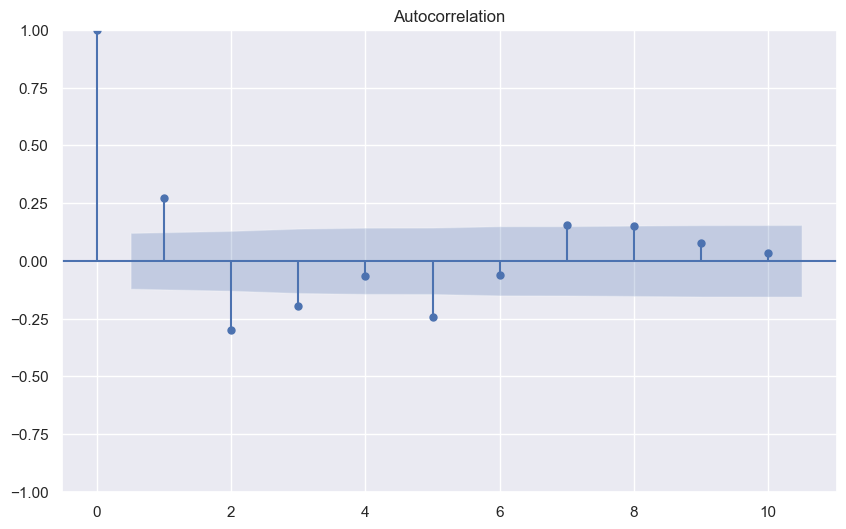

<Figure size 1200x400 with 0 Axes>

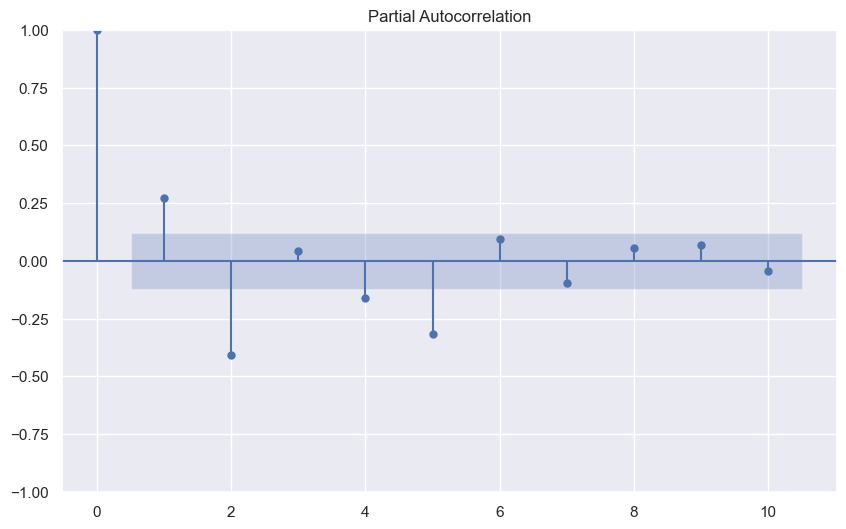

In [138]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.sorted_annualized_roi_df = None
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.sorted_annualized_roi_df = self.data.sort_values(by='Annualized_ROI', ascending=False)
    
    def get_selected_zipcode_info(self):
        """Returns information about the top zipcode."""
        return self.sorted_annualized_roi_df.iloc[0]
    
    def melt_data(self, df):
        """Converts wide-form DataFrame to long-form datetime DataFrame."""
        non_date_columns = ['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Annualized_ROI']
        df_transformed = pd.melt(df, id_vars=non_date_columns, var_name='time', value_name='value')
        df_transformed["time"] = pd.to_datetime(df_transformed["time"], infer_datetime_format=True, errors='coerce')
        df_transformed.set_index("time", inplace=True)
        return df_transformed

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
selected_zipcode = analyzer.get_selected_zipcode_info()

# Create a DataFrame for the selected zipcode and melt the data
df_zip1 = pd.DataFrame([selected_zipcode])
df_zip1Transformed = analyzer.melt_data(df_zip1)

# Replace missing values with the mean of the column
df_zip1Transformed['value'].fillna(df_zip1Transformed['value'].mean(), inplace=True)

# Log Transformation and Differencing
df_zip1Transformed['Log'] = np.log(df_zip1Transformed['value'])
df_zip1Transformed['Log_Diff'] = df_zip1Transformed['Log'].diff()
df_zip1Transformed['Log_Diff_2'] = df_zip1Transformed['Log_Diff'].diff()

# ADF test on first and second differencing
result_log_diff = adfuller(df_zip1Transformed['Log_Diff'].dropna())
result_log_diff_2 = adfuller(df_zip1Transformed['Log_Diff_2'].dropna())

print("\nDickey-Fuller Test - Log and First Differenced Data:")
print("ADF Statistic:", result_log_diff[0])
print("p-value:", result_log_diff[1])

print("\nDickey-Fuller Test - Log and Second Differenced Data:")
print("ADF Statistic:", result_log_diff_2[0])
print("p-value:", result_log_diff_2[1])

# Plot ACF and PACF for the second differenced series
second_diff_series = df_zip1Transformed['Log_Diff_2'].dropna()

plt.figure(figsize=(12, 4))
plot_acf(second_diff_series, lags=10)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(second_diff_series, lags=10)
plt.show()

The ACF plot helps you understand the correlation between an element and its preceding elements. For an ARIMA model, this will help us determine the MA (Moving Average) component.

The PACF plot shows the correlation between an element and its preceding elements but removes the influence of intervening points. It helps us decide the AR (AutoRegressive) component for the ARIMA model.

A sharp drop in ACF after lag k suggests an MA(k) model might be suitable.

A gradual decline suggests an AR model. The PACF plot can similarly guide the selection of AR terms.

Based on the ACF and PACF plots, we will then proceed to fit an ARIMA model with the appropriate parameters.